# Semantic Clustering of Emails using msgvault Data

This notebook inspects the results of a lightweight semantic clustering experiments performed on ~300 archived emails extracted from msgvault.

The goal is to understand whether embeddings can meaningfully group unstructured email text and what patterns emerge.

## Imports

In [4]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading

In [ ]:
ROOT_PATH = Path.cwd().parent

In [7]:
DATA_PATH = Path(ROOT_PATH / "data" / "processed" / "emails_clustered.csv")
df = pd.read_csv(DATA_PATH)

## Basic dataset overview 

In [10]:
df.head(2)

,id,conversation_id,sent_at,subject,snippet,is_from_me,text,cluster_id
0,1,1,2026-02-09 05:37:14+00:00,Updates to our Terms and Privacy Policy,"The updates take effect on February 9th, 2026 ...",0,Subject: Updates to our Terms and Privacy Poli...,0
1,2,2,2026-02-09 05:30:00+00:00,Your Path to a Pro Mix 🎚️ Now up to 70% off,"Legendary UAD sound, bundled the way real stud...",0,Subject: Your Path to a Pro Mix 🎚️ Now up to 7...,4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               300 non-null    int64 
 1   conversation_id  300 non-null    int64 
 2   sent_at          300 non-null    object
 3   subject          300 non-null    object
 4   snippet          300 non-null    object
 5   is_from_me       300 non-null    int64 
 6   text             300 non-null    object
 7   cluster_id       300 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 18.9+ KB


In [12]:
df.groupby('cluster_id').head(3)[["cluster_id", "text"]]

,cluster_id,text
0,0,Subject: Updates to our Terms and Privacy Poli...
1,4,Subject: Your Path to a Pro Mix 🎚️ Now up to 7...
2,5,Subject: New Assignment Released | IITGDS-2501...
3,3,"Subject: shivendu, ever wonder if your reviews..."
4,5,Subject: New Assignment Released | IITGDS-2501...
5,5,Subject: New Assignment Released | IITGDS-2501...
6,0,Subject: build failed for tech-polarity-backen...
7,0,Subject: 'The Wrecking Crew' is now available ...
8,2,Subject: ACTION REQUIRED: Update your credit c...
9,4,"Subject: One $199 Plug-In, or a Year of UAD Sp..."


In [13]:
df.shape

(300, 8)

In [14]:
df['cluster_id'].value_counts().sort_index()

cluster_id
0    109
1     29
2     48
3     32
4     52
5     30
Name: count, dtype: int64

## Plots

### Cluster size distribution

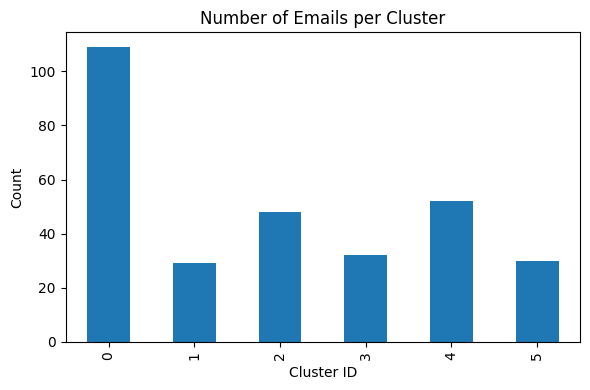

In [18]:
RESULT_PATH = Path(ROOT_PATH / "results" / "cluster_distribution.png")

cluster_counts = df['cluster_id'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
cluster_counts.plot(kind='bar')

plt.title("Number of Emails per Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Count")

plt.tight_layout()
plt.savefig(RESULT_PATH)
plt.show()


## Cluster Inspection

Below, we inspect a small sample of emails from each cluster to understand the dominant themes and assess how clean or noisy each cluster is.

In [16]:
SAMPLES_PER_CLUSTER = 6

for cluster_id in sorted(df['cluster_id'].unique()):
    print(f"\n===== Cluster {cluster_id} =====\n")

    sample = df[df['cluster_id'] == cluster_id].head(SAMPLES_PER_CLUSTER) 

    for i, row in sample.iterrows():
        subject = row["text"].split("\n\n")[0]
        print("-", subject)


===== Cluster 0 =====

- Subject: Updates to our Terms and Privacy PolicyThe updates take effect on February 9th, 2026 ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏
- Subject: build failed for tech-polarity-backendRender We encountered an error during the build process for tech-polarity-backend. This means your build didn&#39;t complete successfully and your latest changes may not be live. Reason: &quot;Exited
- Subject: 'The Wrecking Crew' is now available on Prime VideoWe think you&#39;d like to watch The Wrecking Crew, now on Prime ͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏͏
- Subject: Notes, handled for youFocus on the meeting, note the notes ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏
- Subject: [Product Update] Automatic enablement of new OpenTelemetry ingestion APIWe&#39;re enabling a new OTLP ingestion API starting Mar 4, 2026. MY CONSOLE H

## Observations

- Several clusters are clean and dominated by a single semantic theme, such as:
  - E-commerce transactions and order updates
  - Educational / LMS notifications
  - Promotional content from a single brand
  - Repeated product recommendations

- One cluster primarily groups urgency-driven messages (e.g., billing issues, security alerts, account actions).  
  Although these emails originate from different platforms, they share a common intent and tone, which embeddings successfully capture.

- One cluster acts as a mixed or “catch-all” group containing:
  - product updates
  - newsletters
  - CI/CD notifications
  - policy announcements  
  This behavior is expected with K-Means when some messages do not strongly align with a single dominant theme.

- Noise and overlap arise mainly due to:
  - short or truncated snippets
  - mixed email threads
  - limited context (subject + snippet only)

Despite these limitations, sentence embeddings capture enough semantic signal to produce human-interpretable groupings without any labeled data.


## Interpreted Cluster Themes

| Cluster | Dominant Theme |
|-------|----------------|
| 0 | Mixed informational / newsletters |
| 1 | Product recommendations |
| 2 | Urgency & account actions |
| 3 | E-commerce orders & delivery |
| 4 | Promotional (Audio / Plugins) |
| 5 | Education / LMS notifications |

## Limitations and Next Steps

- Clustering quality is sensitive to the choice of `k` and assumes roughly spherical clusters (K-Means).

- Using only subject + snippet limits context; richer bodies could improve separation.

- Email threads may mix multiple intents within a single message.


With more time, exploration can happen via:
- HDBSCAN for variable-density clusters
- Thread-level aggregation
- Lighweight keyword extraction per cluster